# Machine Learning
---


## Supervised ML:

### Classification and Regression Learning algorithms


#### - Classification algorithms:
> Decision Tree, Logistic Regression, Support Vector Machine (SVM), k-Nearest Neighbour (kNN)
     
#### - Regression algorithms:
> Linear Regression, Polynomial Regression, Lasso and Ridge Regression (LR)

#### Scikit Learn comes with sample data with following sets to learn ML 
> `load_iris(\*[, returnX_y, as_frame])`                :: iris dataset for classification     <br>
> `load_diabetes(\*[, return_X_y, as_frame, scaled])`   :: diabetes dataset for regression     <br>
> `load_digits(\*[, n_class, return_X_y, as_frame])`    :: digits dataset for classification   <br>
> `load_linnerud(\*[, return_X_y, as_frame])`           :: Physical exercise linnerud dataset  <br>
> `load_wine(\*[, return_X_y, as_frame])`               :: Wine dataset for classification     <br>
> `load_breast_cancer(\*[, return_X_y, as_frame])`      :: Breast Cancer Wisconsin dataset for classification 



In Scikit-learn, different model hyperparameters are used.
- `random state`: is a hyperparamater that can be either `None` (default) or ``positive integer including 0``  (Popular: 0 to 42). <br>
  If None is used, then global random state comes from `np.random` and same function will produce different result     for different execution.<br>
  If integers are used, then same result is obtained for different execution of the same function.

!python -m pip install --upgrade pip --no-cache-dir 

In [2]:
import os, sys
import time
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets, metrics
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris   # data is provided with scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

plt.style.use('ggplot')
warnings.filterwarnings("ignore", category=ConvergenceWarning) # Convergence warnings are switched off to display


iris = load_iris()  # loading the iris dataset

XX = iris.data
YY = iris.target
irisDF = pd.DataFrame(XX, columns = iris.feature_names)


In [3]:
# EDA (Exploratory Data Analysis)
irisDF.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
irisDF.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

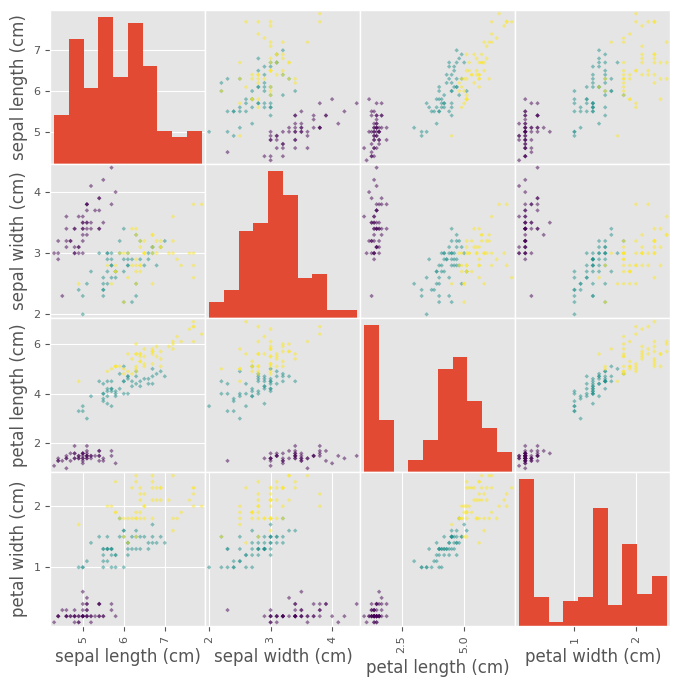

In [5]:
# Visual EDA 
_ = pd.plotting.scatter_matrix(irisDF, c = YY, figsize = [8, 8], s = 5, marker = 'D')

### Decision Tree algorithm (DT)

- Choice of node criterion by maximizing separation gain between the nodes
> Separation gain $\simeq$ Gain (parent cell) - Gain (daughter cell 1) - Gain(daughter cell 2)
- Gain can be computed in many ways like 'gini index', 'entropy' etc.
> Gini index: Gain(cell) $\simeq$ p.(1-p), p: purity
   

Accuracy: 0.978

Confusion Matrix: 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45
 



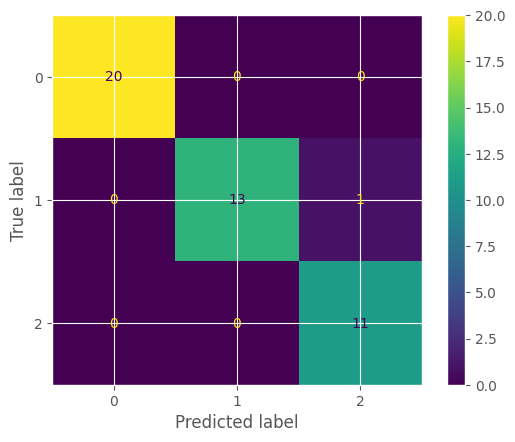

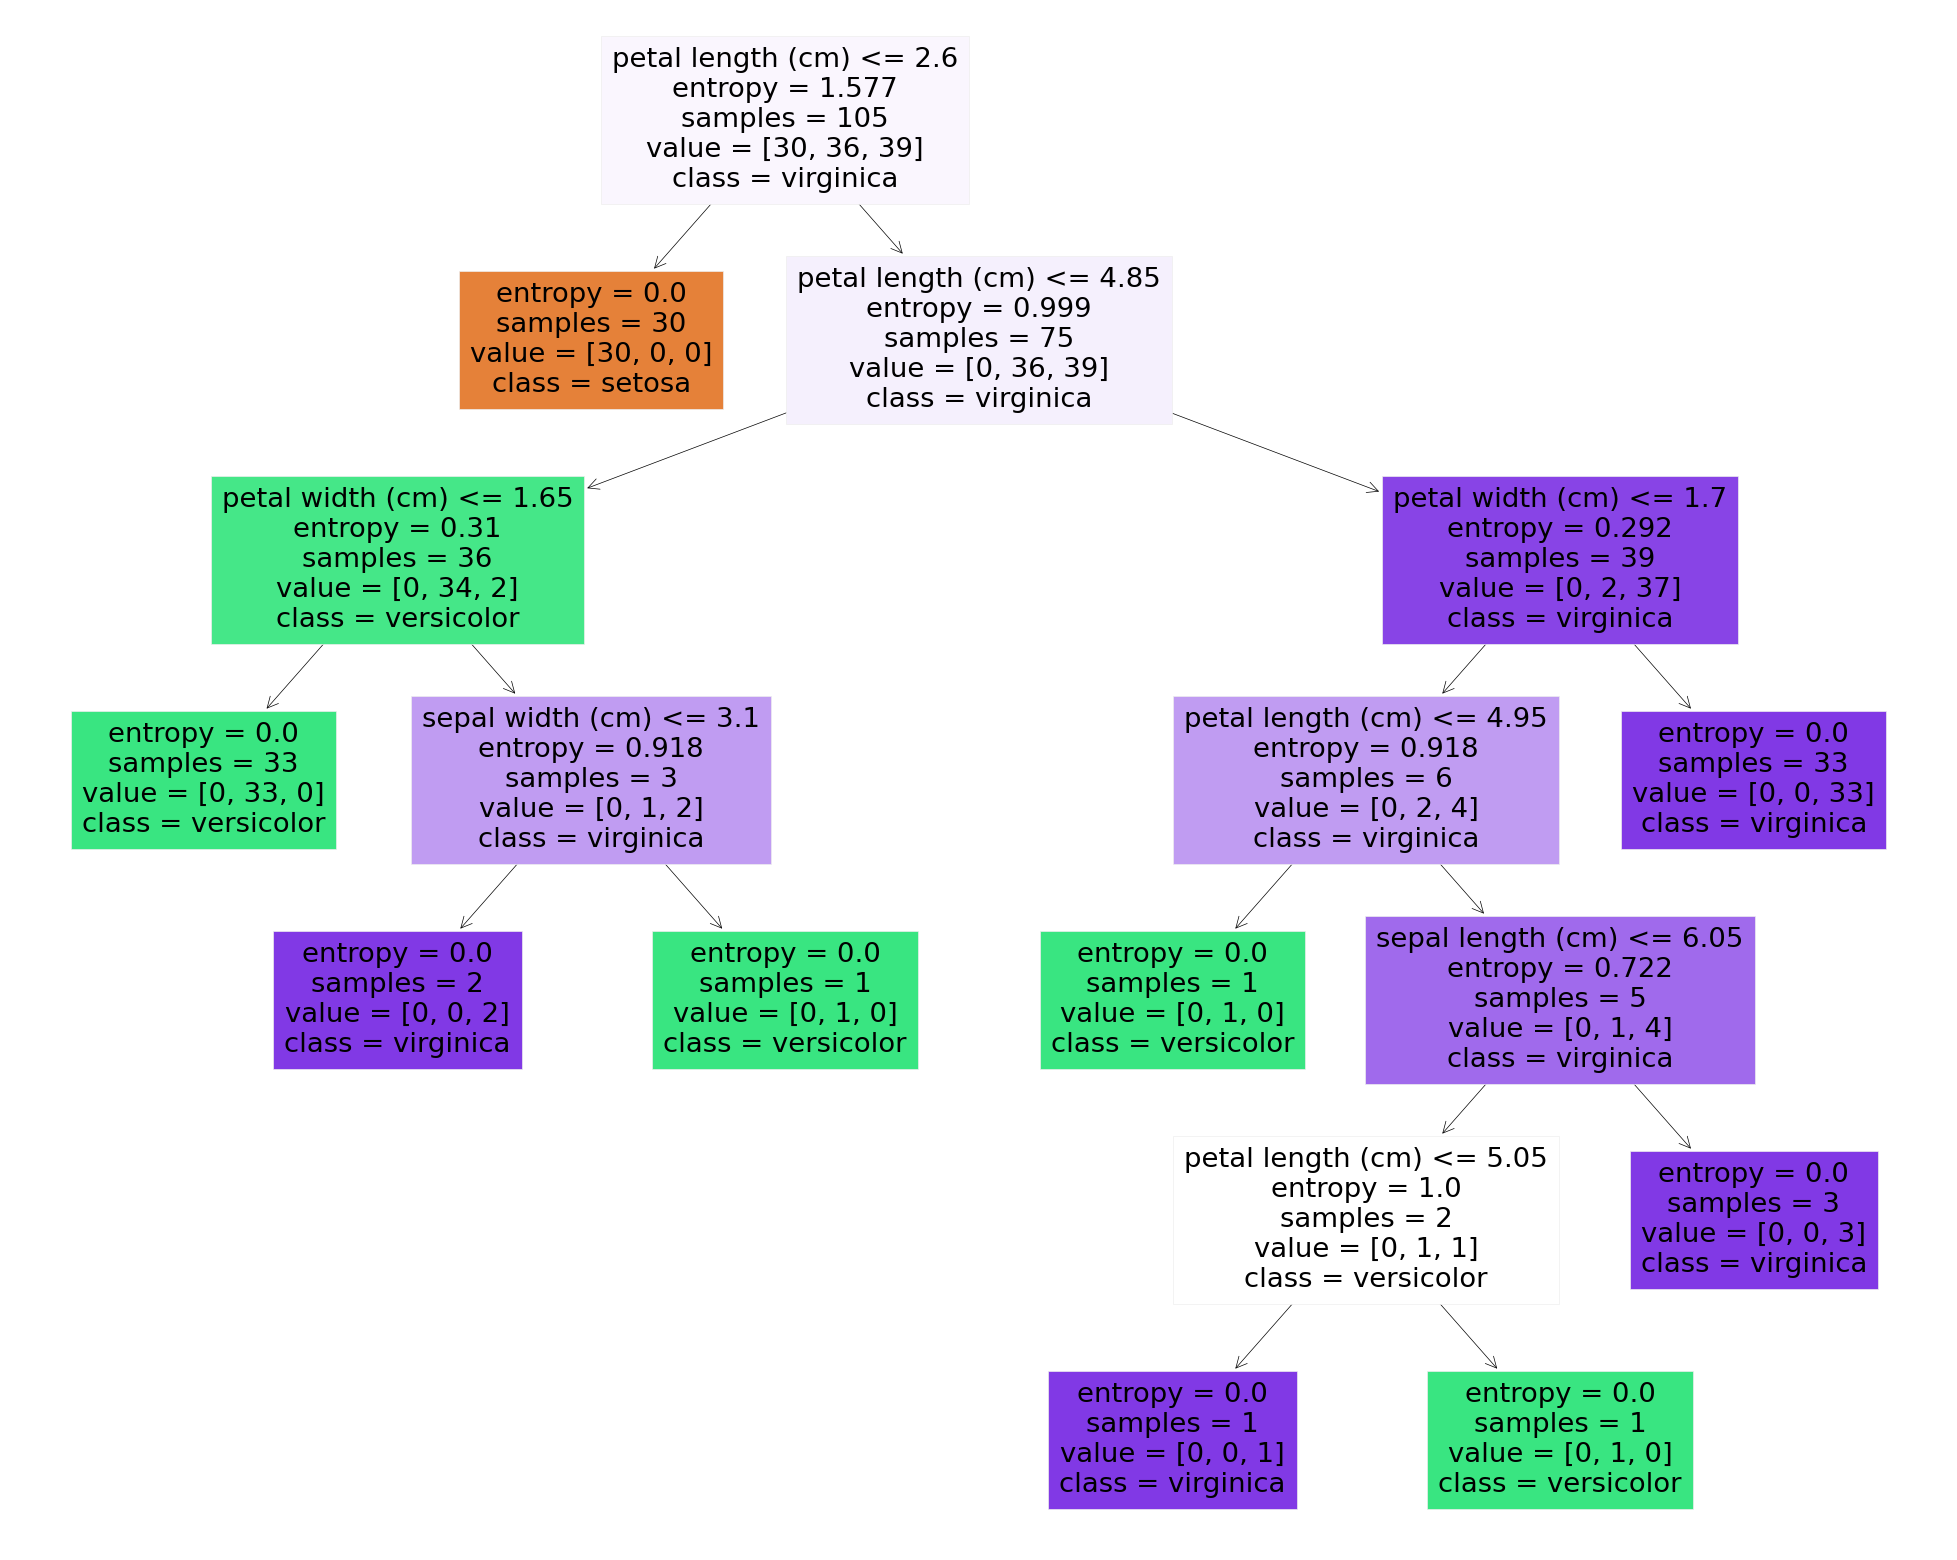

In [6]:
import os, sys
import time
import warnings

from IPython.display import Image
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
from pydotplus import graphviz, graph_from_dot_data, graph_from_dot_file
import seaborn as sns
from six import StringIO

from sklearn import datasets, externals, metrics, tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load sklearn data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing part as it is supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12) # 70% training, 30% test

# Model Decision Tree classifier
# Arguments: 
#        criterion for diff attribute selection measure
# criterion (optional): default is "gini" for the gini index, else "entropy" for the information gain
#        splitter for split strategy
# splitter (optional): "best" for best split else "random" for best random split
#        max_depth for maximum of the depth of the tree. If None nodes are expanded till all leaves contain less 
#             than min_samples_split samples.
# max_depth: int or None (default). Higher value causes over-fitting and lower value causs under-fitting.

# dt_iris = DecisionTreeClassifier()
dt_iris = DecisionTreeClassifier(criterion = 'entropy')

# Train the classifier :: Learning of the model
dt_iris.fit(X_train, y_train)

# Predict with test data set
y_pred = dt_iris.predict(X_test)

# Evaluate the model accuracy
accuracy_score = accuracy_score(y_test, y_pred)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_score:0.3f}\n')
print(f'Confusion Matrix: \n {confusionMatrix} \n')
print(f'Classification Report: \n {classReport} \n')

# Plots model prediction against correct prediction. 
# Here top-right is false positive while 
# bottom-left is false negative
cm_display = ConfusionMatrixDisplay(confusionMatrix).plot()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_iris, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


# Visualize the tree
#my_dot_data = StringIO()   # holds text representation of DTree
#graph = pydotplus.graph_from_dot_data(my_dot_data.getvalue()) # created graph object
#graph.write_png('iris_tree_entropy.png')  # writes the graph to a png file (if reqd)
#graph.write_png('iris_tree_gini.png')  # writes the graph to a png file (if reqd)
#Image(graph.create_png())    # Display in Ipython Display module

### Random Forest : Supervised Learning
- Can be used for both classification and Regression
- Ensemble Method
- Sum of weak learners make a strong learner.

Accuracy: 0.907
 
Confusion Matrix: 
 [[29  0  0]
 [ 0 19  4]
 [ 0  3 20]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.86      0.83      0.84        23
           2       0.83      0.87      0.85        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75
 



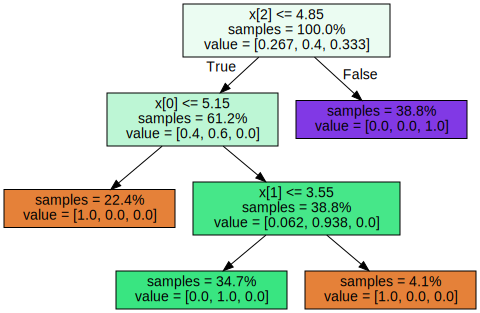

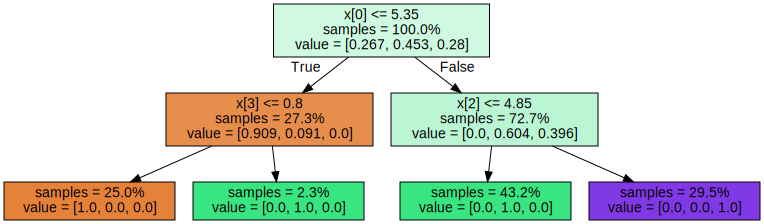

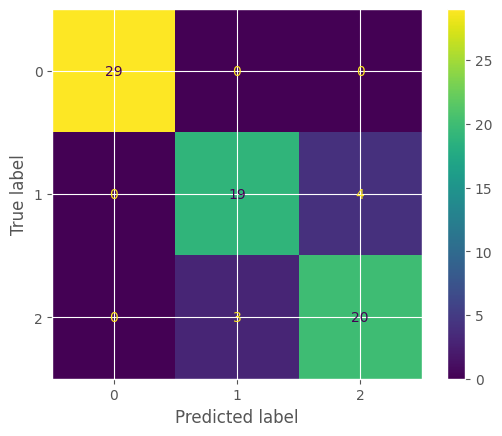

In [7]:
import os, sys
import time
import warnings

import graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
from IPython.display import Image
import seaborn as sns
from scipy.stats import randint
from six import StringIO


from sklearn import datasets, externals, metrics, tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import export_graphviz

# Load sklearn data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing part as it is supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12) # 70% training, 30% test

# Model Decision Tree classifier
# Arguments: 
#        criterion for diff attribute selection measure
# criterion (optional): default is "gini" for the gini index, else "entropy" for the information gain
#        splitter for split strategy
# splitter (optional): "best" for best split else "random" for best random split
#        max_depth for maximum of the depth of the tree. If None nodes are expanded till all leaves contain less 
#             than min_samples_split samples.
# max_depth: int or None (default). Higher value causes over-fitting and lower value causs under-fitting.


rf_iris = RandomForestClassifier()

# Train the classifier :: Learning of the model
rf_iris.fit(X_train, y_train)

# Predict with test data set
y_pred = rf_iris.predict(X_test)

# Evaluate the model accuracy
accuracy_score = accuracy_score(y_test, y_pred)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_score:0.3f}\n ')
print(f'Confusion Matrix: \n {confusionMatrix} \n')
print(f'Classification Report: \n {classReport} \n')

cm_display = ConfusionMatrixDisplay(confusionMatrix).plot()

# Visualize for 1st 2 DTrees
for i in range(2):
    tree = rf_iris.estimators_[i]
    dot_data = export_graphviz(tree, filled=True, impurity=False, proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)

## Performance Measurement
### AUC - ROC Curve
- ROC: Receiver Operating Characteristics: Proaility Curve
- AUC: Area Under the Curve: Degree of separability of classes
- Higher the AUC, better will be predictibility
- AUC=0.5: Classifier is unable to classify.


DataFrame(X): 
            0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11      

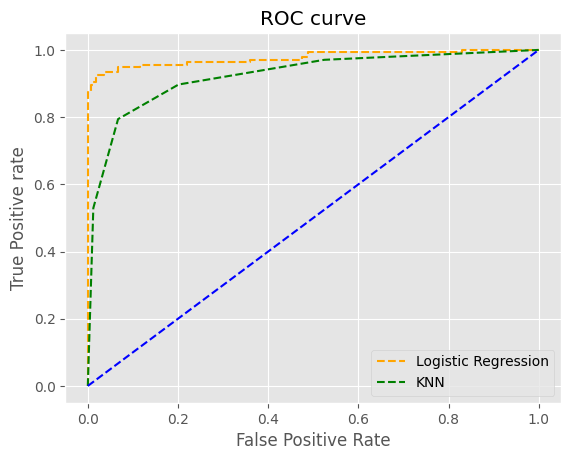

In [8]:
#  Binary Classification

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

print(f'DataFrame(X): \n {pd.DataFrame(X)}')
print(f'DataFrame(y):\n {pd.Series(y)}')

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(f'AUC score1: {auc_score1} AUC score2: {auc_score2}' )

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

DataFrame(X): 
            0         1         2         3         4         5         6   \
0    1.996152  0.210926  1.103174 -0.108468 -0.032019  0.328535  0.115026   
1    0.600733  0.141980  0.608267 -1.019396  1.345935  1.360168  0.313723   
2   -1.972089 -1.443926 -0.941403 -0.433355  1.120967  0.975823  0.444854   
3   -0.549159 -0.120587 -1.487862 -0.274024 -1.125186 -1.173873 -1.340125   
4    0.598996 -0.494190  1.165595 -0.245546 -0.058833  0.191124  0.283845   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.158002  1.317351  0.205413 -0.173186  1.209086 -1.002109  0.984296   
996  1.068379  2.303639  1.146441  0.112124 -0.973379  0.336145 -1.479444   
997 -0.965396 -0.765481  1.895575 -0.367034 -1.916301 -0.315568 -0.043546   
998 -0.638586  0.623087 -0.998441 -0.436529  1.623257  0.392914  0.239858   
999  0.622944 -0.787036  0.239873 -0.816836  1.485477 -0.220729 -0.978266   

           7         8         9         10        11      

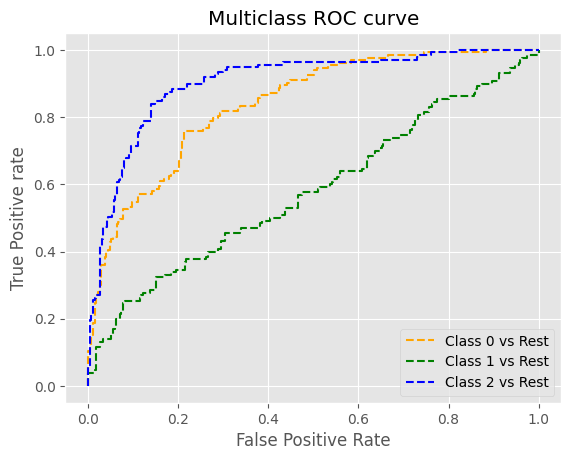

In [9]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f'DataFrame(X): \n {pd.DataFrame(X)}')
print(f'DataFrame(y):\n {pd.Series(y)}')

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

---
## Logistic Regression :: Classification :: Supervised
> Data loaded is divided into two parts. <br>
> One part is used to train the model (a math function).
> The other part is used to test the trained model. <br><br>
> scikit-learn has in built split function to separate data as per ratio mentioned by user.  <br>
> Solvers:                                                                           <br>
> "lbfgs" solver has been used which is slow but accurate solver.                    <br>
> Other solvers like "newton-cg", "sag", "saga"                                      <br><br>
> If classes == 2, then it is binary class.                                           <br>
> If multi_class, then selectone of : One-vs-Rest (OVR), One-vs-All (OVA), multinomial  <br><br>
> "Penalty" parameter of the solver selects type of regularization                      <br>
> "C-parameter" controls the strength of regularization.
> Higher "C" results less regularised model which could be more accurate but overfitted.    <br><br>
> Parameters can be optimised using GridSearchCV function

In [10]:
import os, sys
import time
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets, metrics
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.datasets import load_iris   # data is provided with scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

plt.style.use('ggplot')
warnings.filterwarnings("ignore", category=ConvergenceWarning) # Convergence warnings are switched off to display


iris = load_iris()  # loading the iris dataset

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25)

lr_iris = LogisticRegression(C = 1.0, solver = 'lbfgs', multi_class = 'ovr')  # C = 0.0 : 1.0 

lr_iris.fit(X_train, y_train)  # Train the model on the training set

lr_score = lr_iris.score(X_test, y_test)

# lr_X_New = np.array([[5.1, 3.5, 1.4, 0.2]])  # Make predictions on the new data

lr_X_New = np.array([[6.5, 3.2, 5.1, 2.0]])
lr_prediction = lr_iris.predict(lr_X_New)

print("Predictions: ", lr_prediction)
print(f'Accuracy: {lr_score:0.3f}\n')

Predictions:  [2]
Accuracy: 1.000



---
### *Here parameters are determined to tune the model*
> penalty = ['l1', 'l2']   # l1: lasso, l2: ridge                       <br>
> max_iter = [80, 100, 150]   # sklearn default is 100                  <br>
> CList = np.linspace(0.1, 1.0, num = 5)                                <br>
> param_grid = dict(max_iter = max_iter, C = CList, penalty = penalty)  <br>
> param_grid = [{'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
>   {'penalty': ['elasticnet', 'l1', 'l2', None]},              
>   {'C':       [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0, 5.0, 10.0, 20.0, 30.0, 50.0, 70.0, 100.0]}
>]

In [11]:
param_grid = {"C":np.linspace(1.0e-5, 1, 10), "penalty":["l2"], 
              # "multi_class": ['ovr', 'multinomial'],  <---- working with warning for other
              "solver":['newton-cg', 'liblinear', 'sag', 'saga', 'lbfgs'], 
              "max_iter":[500], "class_weight":['balanced']} 

#  <----------------------------- WORKING ---------------------------->
#lr_grid = GridSearchCV(estimator = LogisticRegression(param_grid), # (C = 1.0, class_weight = None, dual = False, fit_intercept=True, penalty='l2', tol=1.0e-5 ), 
#                       param_grid = param_grid, 
#                       cv = 10, refit = True,
#                       scoring = 'accuracy',
#                       verbose = 0)   # Check C

lr_grid = GridSearchCV(estimator = LogisticRegression(C = 1.0, class_weight = None, 
                                                      dual = False, fit_intercept=True, penalty='l2', tol=1.0e-5 ), 
                       param_grid = param_grid, 
                       cv = 10, refit = True,
                       scoring = 'accuracy',
                       verbose = 0)   # Check C


time0 = time.time()
lr_grid_result = lr_grid.fit(X_train, y_train)

print(f'Best: {lr_grid_result.best_score_:0.3f} using {lr_grid_result.best_params_}')
print(f'Execution time: {(time.time() - time0):0.3f} ms')

Best: 0.973 using {'C': 0.7777799999999999, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Execution time: 5.039 ms


#### Now create the LogisticRegression model using the best parameter above

In [12]:
lr_iris = LogisticRegression(C = 0.4445, solver = 'saga', penalty = 'l2', 
                             class_weight = 'balanced', max_iter=500)  # C = 0.0 : 1.0 

lr_iris.fit(X_train, y_train)  # Train the model on the training set

lr_score = lr_iris.score(X_test, y_test)

# lr_X_New = np.array([[5.1, 3.5, 1.4, 0.2]])  # Make predictions on the new data

lr_X_New = np.array([[6.5, 3.2, 5.1, 2.0]])
lr_prediction = lr_iris.predict(lr_X_New)

print("Predictions: ", lr_prediction)
print(f'Accuracy: {lr_score:0.3f}')

Predictions:  [2]
Accuracy: 1.000


---
## Support Vector Machine (SVM)
> SVM can be both binary or multiclass       <br>
> Kernel parameter                           <br>
> C parameter: regularizing factor as before <br>
> gamma Parameter                            <br>

Confusion Matrix: 
 [[11  0  0]
 [ 0 14  1]
 [ 0  0 12]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



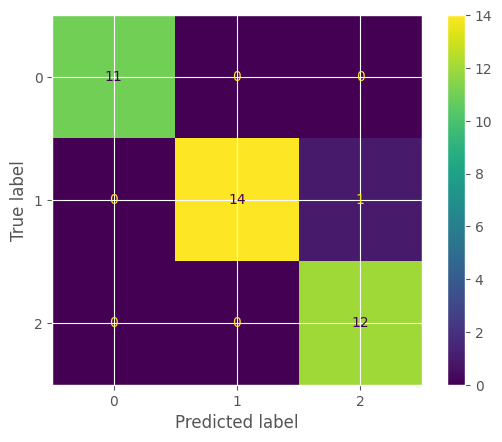

In [12]:
import sklearn.svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve

# .predict_proba is NOT defined for LinearSVC. So probability argument is switched ON
classifier = SVC(kernel='linear', C = 1.0, random_state = 12, probability = True)   
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print("Confusion Matrix: \n", confusionMatrix)

cm_display = ConfusionMatrixDisplay(confusionMatrix).plot()

print("\nClassification Report: \n",classReport)

---
### Artificial Neural Network (ANN)
> Scikit-learn implements NN through `MLPClassifier` and `MLPRegressor`

Confusion Matrix: 
 [[11  0  0]
 [ 0 13  2]
 [ 0  0 12]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



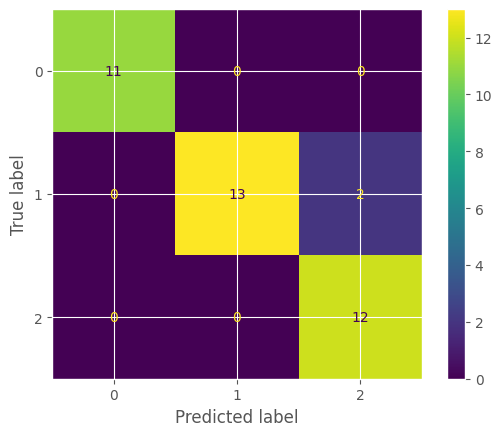

In [13]:
import sklearn.neural_network
from sklearn.neural_network import MLPClassifier, MLPRegressor

neuralNet = MLPClassifier(hidden_layer_sizes = (10, 10), activation = 'relu')
neuralNet.fit(X_train, y_train)
y_pred = neuralNet.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print("Confusion Matrix: \n", confusionMatrix)

cm_display = ConfusionMatrixDisplay(confusionMatrix).plot()

print("\nClassification Report: \n",classReport)

## Bagging (Ensemble based Supervised learning)

- Dataset is divided into several subsets of data using bootstrap sampling picking data points at random with         replacement.
- Multiple base models are trained independently in parallel on different subsets.
- For Bagging Classifier, the final prediction is made by aggregating the predictions of all-base models using         majority voting.
- For Bagging Regression, the final prediction is made by averaging the predictions of the all-base models.

In [13]:
class OurBaggingClassifier:
    def __init__(self, base_classifier, n_estimators):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.classifiers = []
        
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling with replacement
            indices = np.random.choice(len(X), len(X), replace = True)
            X_sampled = X[indices]
            y_sampled = y[indices]
            
            # Create a new base classifier and train it on the sampled datasets
            classifier = self.base_classifier.__class__()
            classifier.fit(X_sampled, y_sampled)
            
            # Store the trained classifier in the list of classifiers
            self.classifiers.append(classifier)
        return self.classifiers
    
    def predict(self, X):
        # Make predictions using all the base classifiers
        predictions = [classifier.predict(X) for classifier in self.classifiers]
        # Aggregate predictions using majority voting
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis = 0, arr = predictions)
        return majority_votes

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading digits dataset from sklearn
digit = load_digits()
X, y = digit.data, digit.target


# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Create the base classifier
dTree = DecisionTreeClassifier()
model = OurBaggingClassifier(base_classifier=dTree, n_estimators=10)
classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:0.3f}\n')

# Now Checking accuracy of each individual classifier
for i, clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy {i+1 }: {accuracy:0.3f}')

Accuracy: 0.925

Accuracy 1: 0.819
Accuracy 2: 0.836
Accuracy 3: 0.825
Accuracy 4: 0.825
Accuracy 5: 0.844
Accuracy 6: 0.856
Accuracy 7: 0.814
Accuracy 8: 0.847
Accuracy 9: 0.839
Accuracy 10: 0.839


In [17]:
# Lets us Use Bagging Classifier from SKLEARN

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading digits dataset from sklearn
digit = load_digits()
X, y = digit.data, digit.target


# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Create the base classifier
dTree = DecisionTreeClassifier()
model = BaggingClassifier(estimator=dTree, n_estimators=10)
classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:0.3f}\n')
accuracy1 = model.score(X_test, y_test)
print(f'Model Score:  {accuracy1:0.3f}')


# Now Checking accuracy of each individual classifier
for i, clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy1 = model.score(X_test, y_pred)
    print(f'Accuracy {i+1 }: {accuracy:0.3f}  Model Score: {accuracy1:0.3f}')

Accuracy: 0.936

Model Score:  0.936
Accuracy 1: 0.839  Model Score: 0.850
Accuracy 2: 0.886  Model Score: 0.903
Accuracy 3: 0.850  Model Score: 0.864
Accuracy 4: 0.794  Model Score: 0.808
Accuracy 5: 0.844  Model Score: 0.867
Accuracy 6: 0.864  Model Score: 0.867
Accuracy 7: 0.842  Model Score: 0.839
Accuracy 8: 0.844  Model Score: 0.853
Accuracy 9: 0.844  Model Score: 0.878
Accuracy 10: 0.836  Model Score: 0.847


## Gradient Boosting 
- Gradient Boosting can be used for both Classification and Regression problems
- It is an algorithm that fits boosted decision trees by minimizing error gradient.


In [17]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data (Diabetes)
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

params = {"n_estimators": 500,
          "max_depth": 4,
          "min_samples_split": 5,
          "learning_rate": 0.01,
          "loss": "squared_error",
         }

# Model
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse)
print(f'The mean Squared Error (MSE) on test set: {mse:0.4f}   RMSE: {rmse:0.3f}\n')

The mean Squared Error (MSE) on test set: 3019.1906   RMSE: 54.947



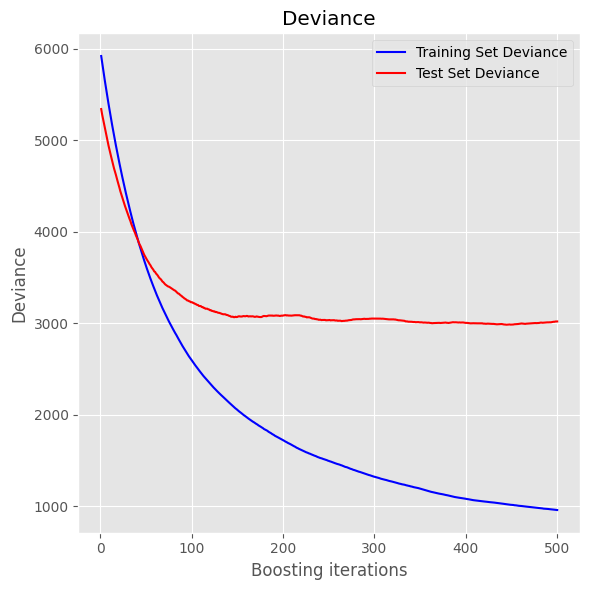

In [18]:
# Visualization
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title("Deviance")
plt.plot(np.arange(params["n_estimators"]) + 1,
         reg.train_score_,
         "b-",
         label="Training Set Deviance"
        )
plt.plot(np.arange(params["n_estimators"]) +1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

###  Permutation feature Importance
- It is a model inspection technique to use for any fitted estimator when data is tabular.
- This is useful for non-linear and opaque estimators.
- This feature breaks the feature-target relationship. 
- Therefore there is drop in model score indicating dependency of the model on that feature.
- Calculation of cross-validation is important to gauge a model before getting importance.

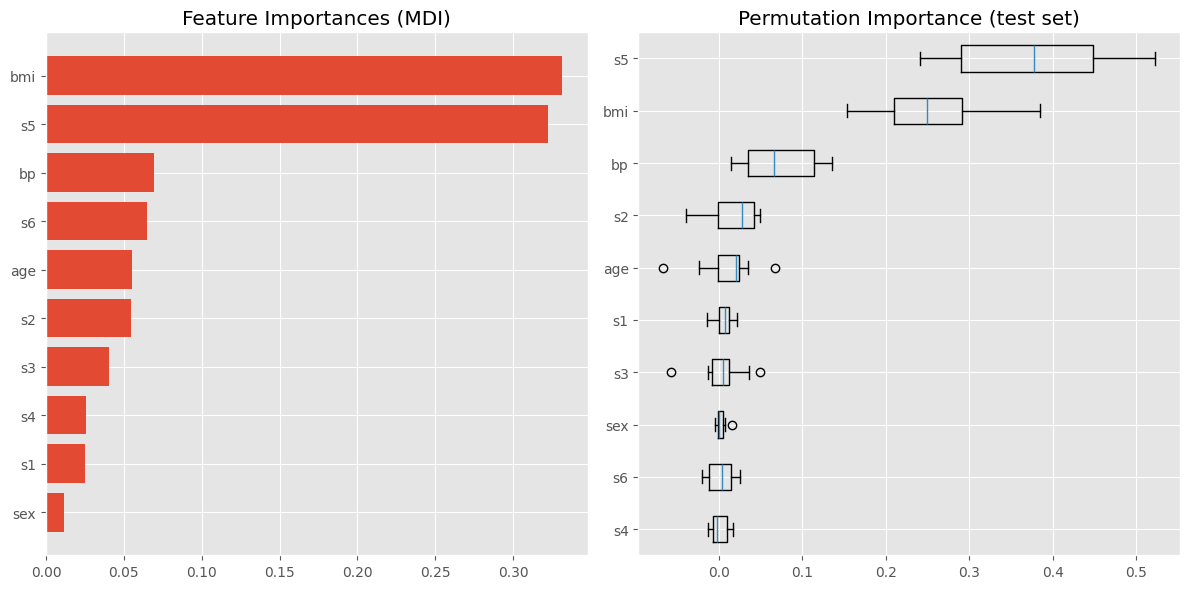

In [19]:
# Plot feature importance
# Impurity based feature importances may be misleading. 
# Alternately permutation importances may be computed

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importances (MDI)")

result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs = 2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T, vert = False, labels=np.array(diabetes.feature_names)[sorted_idx],)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Dataset generation using sklearn to test algorithm
- `make_classification` generates a random n-class problem
- `make_regression` generates a random regression problem

### Gradient Boosting for Classification 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split

argsClass = {
    "n_samples"    : 1000, # number of samples default 100
    "n_features"   : 20,   # total features including informative, redundant, duplicate and useless features
    "n_informative": 15,   # Features that carry information.
    "n_redundant"  : 5,    # Redundant features as linear combination of informative features
    "n_repeated"   : 0,    # Duplicate features
    "n_classes"    : 5,    # Number of classes. 2 for binary, more for multiclasses
    "class_sep"    : 0.9,  # Default 1.o. Value lower than 1 reduces space and makes classification harder
    "random_state" : 12,
}

# Define dataset for classification problem
X, y = make_classification(**argsClass)
print(f'X dataset shape: {X.shape}, Feature shape: {y.shape}')  # test the dataset

# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Create the GBC model
modelGBC = GradientBoostingClassifier()

# Evaluate the model
argsXV = {
    "n_splits": 10,
    "n_repeats": 3, 
    "random_state": 1,
}
xValidate = RepeatedStratifiedKFold(**argsXV)
n_scores = cross_val_score(modelGBC, X, y, scoring='accuracy', cv=xValidate, n_jobs=-1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores):0.3f} with std. deviation: {np.std(n_scores):0.3f}')

# Fit model on the whole Dataset
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train, y_train)

# Taking a single test data at random
nFeature = argsClass["n_features"]

#for key in argsClass.keys():
#    print(f'{key}   : {argsClass[key]}')

nDataLevel = 3
x0= np.array(X_test[nDataLevel]).reshape((-1,nFeature))
print(f'\n x0: {x0}')

y_pred = modelGBC.predict(x0)

print(f'\n Prediction using Test Data: {y_pred[0]}  \n\n Y_test: \n {y_test}')

X dataset shape: (1000, 20), Feature shape: (1000,)
Accuracy: 0.656 with std. deviation: 0.043

 x0: [[ 0.09704121 -1.66381896  1.34788982 -0.36169355  1.78387446  2.54501894
   3.53079737  0.7197704  -4.00313328  6.81611538  1.29105053  3.42139239
   6.29948942 -1.10480243 -5.657259   -0.51642086 -1.04186887  3.13208917
   2.88036678  0.28278426]]

 Prediction using Test Data: 0  

 Y_test: 
 [1 4 4 0 1 4 3 3 2 3 3 0 3 2 3 1 3 2 3 0 1 0 2 4 2 4 0 4 0 0 1 4 3 4 2 0 2
 2 3 4 1 1 1 4 1 2 0 0 4 0 2 4 3 2 0 1 4 2 3 2 3 2 2 0 2 0 3 3 2 1 0 4 2 1
 1 4 4 3 3 2 0 4 0 3 1 3 4 2 1 1 4 0 1 1 4 2 4 0 0 4 2 1 3 2 4 1 1 1 1 4 3
 2 3 2 1 1 4 2 3 0 1 1 0 3 4 0 1 0 0 3 4 4 2 4 1 0 3 4 2 1 1 2 4 3 4 0 3 4
 3 0 0 4 0 1 2 1 4 0 4 0 2 0 4 0 2 4 4 0 1 3 2 3 0 3 0 3 2 1 2 4 2 2 0 4 2
 1 1 0 2 4 3 3 4 3 4 1 0 0 4 0]


### Gradient Boosting for Regressing

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split

argsClass = {
    "n_samples"    : 1000, # number of samples default 100
    "n_features"   : 20,   # total features including informative, redundant, duplicate and useless features
    "n_informative": 15,   # Features that carry information.
    "noise"        : 0.0,   # std. dev of gaussian applied to o/p, default 0.0.
    "random_state" : 1,
}

# Define dataset for classification problem
X, y = make_regression(**argsClass)
print(f'X dataset shape: {X.shape}, Feature shape: {y.shape}')  # test the dataset

# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Create the GBR model
modelGBR = GradientBoostingRegressor()

# Evaluate the model
argsXV = {
    "n_splits": 10,
    "n_repeats": 3, 
    "random_state": 1,
}
xValidate = RepeatedKFold(**argsXV)
n_scores = cross_val_score(modelGBR, X, y, scoring='neg_mean_absolute_error', cv=xValidate, n_jobs=-1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores):0.3f} with std. deviation: {np.std(n_scores):0.3f}')

# Fit model on the whole Dataset
modelGBR = GradientBoostingRegressor()
modelGBR.fit(X_train, y_train)

# Taking a single test data at random
nFeature = argsClass["n_features"]

#for key in argsClass.keys():
#    print(f'{key}   : {argsClass[key]}')

nDataLevel = 2
x0= np.array(X_test[nDataLevel]).reshape((-1,nFeature))

y_pred = modelGBR.predict(x0)
print(f'Prediction using Test Data: {y_pred[0]}')

X dataset shape: (1000, 20), Feature shape: (1000,)
Accuracy: -65.030 with std. deviation: 4.923
Prediction using Test Data: 217.9079582815323


### Gradient Boosting with XGBoost (Extreme Gradient Boosting)

- XGBoost is an implementation of Gradient Boosted decision trees designed for speed and performance


### XGBoost for Classification


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from xgboost import XGBClassifier

argsClass = {
    "n_samples"    : 1000, # number of samples default 100
    "n_features"   : 20,   # total features including informative, redundant, duplicate and useless features
    "n_informative": 15,   # Features that carry information.
    "n_redundant"  : 5,    # Redundant features as linear combination of informative features
    "n_repeated"   : 0,    # Duplicate features
    "n_classes"    : 5,    # Number of classes. 2 for binary, more for multiclasses
    "class_sep"    : 0.6,  # Default 1.o. Value lower than 1 reduces space and makes classification harder
    "random_state" : 10,
}

# Define dataset for classification problem
X, y = make_classification(**argsClass)
print(f'X dataset shape: {X.shape}, Feature shape: {y.shape}')  # test the dataset

# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

# Create the GBC model
modelXGBC = XGBClassifier()


# Evaluate the model
argsXV = {
    "n_splits": 10,
    "n_repeats": 3, 
    "random_state": 10,
}
xValidate = RepeatedStratifiedKFold(**argsXV)
n_scores = cross_val_score(modelXGBC, X, y, scoring='accuracy', cv=xValidate, n_jobs=-1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores):0.3f} with std. deviation: {np.std(n_scores):0.3f}')

# Fit model on the whole Dataset
modelXGBC = XGBClassifier()
modelXGBC.fit(X_train, y_train)

# Taking a single test data at random
nFeature = argsClass["n_features"]

#for key in argsClass.keys():
#    print(f'{key}   : {argsClass[key]}')

nDataLevel = 3
x0= np.array(X_test[nDataLevel]).reshape((-1,nFeature))

y_pred = modelXGBC.predict(x0)
print(f'Prediction using Test Data: {y_pred}  \n\n Y_test: \n {y_test}')

X dataset shape: (1000, 20), Feature shape: (1000,)
Accuracy: 0.621 with std. deviation: 0.042
Prediction using Test Data: [3]  

 Y_test: 
 [3 0 0 3 4 0 1 0 2 0 3 3 0 2 0 2 1 3 2 2 2 3 0 0 3 1 4 0 1 0 2 2 1 3 1 0 2
 1 4 4 4 2 0 4 2 0 4 2 2 0 1 4 3 1 4 0 1 1 0 1 0 4 1 3 0 2 2 0 3 0 3 2 2 4
 0 0 3 1 2 0 0 1 1 4 4 3 1 4 4 2 1 1 0 2 3 1 0 0 1 4 3 2 3 3 2 1 1 4 4 1 4
 2 0 2 1 1 4 3 1 1 4 3 2 0 2 0 4 2 0 2 3 1 1 3 1 3 2 4 2 2 1 1 4 3 0 3 2 0
 1 1 1 4 3 4 4 2 1 3 0 2 0 2 4 4 1 2 2 4 4 3 1 1 3 4 4 2 2 2 0 3 1 3 3 2 2
 0 1 3 2 0 4 2 2 1 3 4 2 1 4 2]


### XGBoost for Regression

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from xgboost import XGBRegressor

argsClass = {
    "n_samples"    : 1000, # number of samples default 100
    "n_features"   : 20,   # total features including informative, redundant, duplicate and useless features
    "n_informative": 15,   # Features that carry information.
    "noise"        : 0.0,   # std. dev of gaussian applied to o/p, default 0.0.
    "random_state" : 1,
}

# Define dataset for classification problem
X, y = make_regression(**argsClass)
print(f'X dataset shape: {X.shape}, Feature shape: {y.shape}')  # test the dataset

# Generating pandas dataframe suitable for plotting
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.describe)
#colors = {0:'red', 1:'blue', 2:'green'}
#fig, ax = plt.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
    #print(f'Keys: {key}')
#    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key) #, color=colors[key])
#plt.show()

# Split data in to test and training modes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Create the GBR model
modelXGBR = XGBRegressor(objective='reg:squarederror')

# Evaluate the model
argsXV = {
    "n_splits": 10,
    "n_repeats": 3, 
    "random_state": 1,
}
xValidate = RepeatedKFold(**argsXV)
n_scores = cross_val_score(modelXGBR, X, y, scoring='neg_mean_absolute_error', cv=xValidate, n_jobs=-1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores):0.3f} with std. deviation: {np.std(n_scores):0.3f}')

# Fit model on the whole Dataset
modelXGBR = XGBRegressor(objective='reg:squarederror')
modelXGBR.fit(X_train, y_train)

# Taking a single test data at random
nFeature = argsClass["n_features"]

#for key in argsClass.keys():
#    print(f'{key}   : {argsClass[key]}')

nDataLevel = 2
x0= np.array(X_test[nDataLevel]).reshape((-1,nFeature))

y_pred = modelXGBR.predict(x0)
print(f'Prediction using Test Data: {y_pred[0]}')

X dataset shape: (1000, 20), Feature shape: (1000,)
<bound method NDFrame.describe of             x         y       label
0    1.082961  0.616448  128.906502
1    1.305918 -1.055876   52.193487
2    0.047355  1.810386  346.281915
3   -0.720024 -0.463529 -449.739499
4   -2.376723 -0.646840   53.840859
..        ...       ...         ...
995 -2.029945 -2.103493   53.968560
996 -1.575730 -1.878439 -324.284336
997  1.306187 -1.467466  234.871820
998  0.528303 -0.748184 -157.127623
999  0.679301 -0.464115  150.060641

[1000 rows x 3 columns]>
Accuracy: -79.689 with std. deviation: 7.400
Prediction using Test Data: 337.8624572753906
